![Title](cisco.png)

## Internet Traffic Data Linear Regression 

## Part 1:  Import the Libraries
#### Step 1: Install the of scikit-learn library

In [1]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


#### Step 2: Import the rest of  the libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

`sklearn` es una de las bibliotecas de Pyhton más utilizadas para el aprendizaje automático. Implementa una amplia variedad de métodos, además de ofrecer funcionalidades de preprocesamiento, validación transversal,...

In [3]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

## Part 2: Visualize the Historical Data
#### Step 1: Load  historical Internet traffic data.

In [6]:
filename = './internet_traffic_hist.csv'
df_hist = pd.read_csv(filename) 
df_hist.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


#### Step 2: Visualize the internet volume traffic.

De acuerdo con Cisco VNI Forecast, el tráfico de Internet fijo de los consumidores crecerá un 22 % por año desde 2015 hasta 2020. Se asumirá que el índice de crecimiento fue el mismo entre 2005 y 2015 y el valor del tráfico de Internet correspondiente al año 2005 se fija en 100. El `DataFrame` `df_hist`contiene la evolución del volumen de tráfico de Internet fijo hasta 2015 (más o menos una determinada variación interanual).

Utilice las funciones `matplotlib` para visualizar la evolución del volumen de tráfico año tras año.

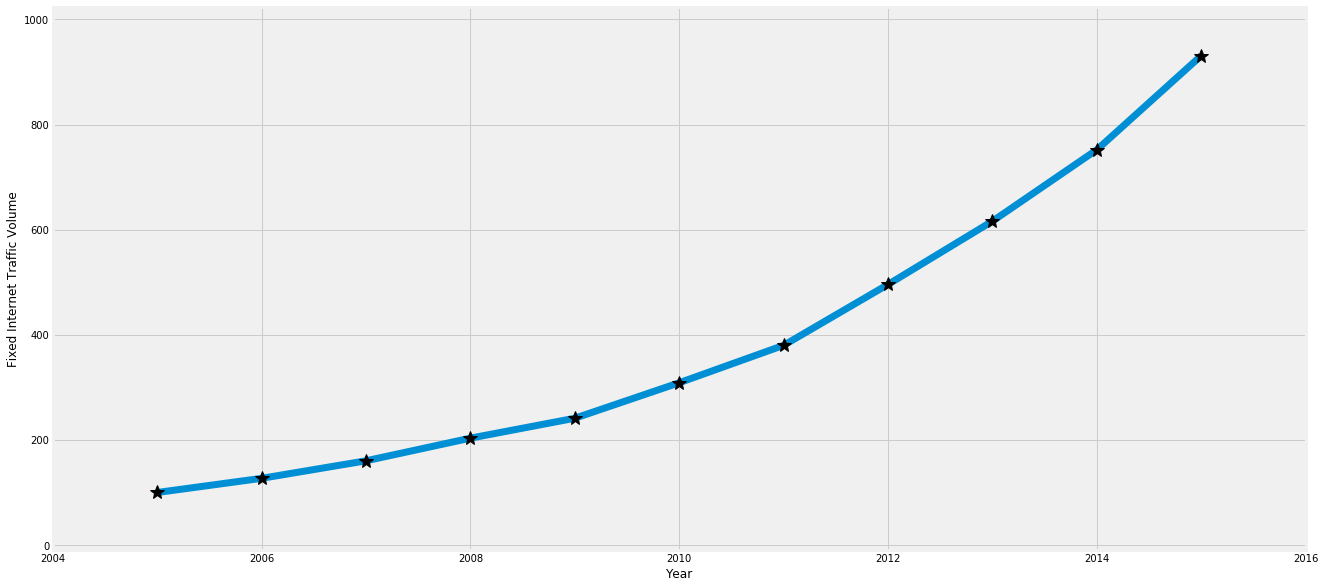

In [7]:
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

# XY Plot of year and traffic
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

## Part 3: Simple Linear Regression: First Order Polynomial

Para un analista de datos, una tarea de regresión se puede considerar un proceso de decisión de dos etapas:

- **Elegir el modelo de regresión** que se utilizará para registrar la relación matemática entre las variables observadas.

- **Adapte** el modelo determinado a los datos, es decir, elija una métrica para evaluar la calidad de aptitud de un modelo y calcule los valores de los parámetros que maximicen dicha métrica.

La elección de la familia de modelos que se adaptará es el primer paso fundamental en la regresión.

En el primer paso, la *compensación* se da entre un modelo más simple (cuyos parámetros son fáciles de computar pero podrían no adaptarse satisfactoriamente a los datos) y uno más complejo, que podría lograr mayor calidad de aptitud pero requiere más cálculos para estimar los parámetros óptimos.

Cuando se decide la familia de modelos, el segundo paso también implica una compensación: Se denomina compensación por variación de sesgo, que es determinada por la elección de la métrica de evaluación. Si omitimos los detalles matemáticos, la idea es la siguiente: incluso para el modelo elegido, sigue siendo posible refinar los parámetros para aumentar la calidad de aptitud dentro del rango de los datos observados o generalizar mejor fuera de él.

En el resto de esta práctica de laboratorio verá ejemplos en los que se demuestra de qué manera las elecciones que se realizan en el primer y segundo paso generan soluciones diferentes para estas compensaciones. La meta del análisis de regresión es modelar una relación entre dos variables cuantificables. Un modelo de regresión polinómica general tiene la siguiente forma:

$$ y = a_0 + a_1  x  + a_2  x ^ 2 +... + a_n  x ^ n $$

donde `n` es el orden de la potencia.

Comenzamos con el modelo de regresión lineal simple en el que la variable *n* se definirá en 1.

$$ y = a_0 + a_1  x $$
 
Este modelo tiene la misma forma que una ecuación lineal:

$$ y = m x + b $$

donde `m` es la pendiente de la línea `b` es la intersección con el eje y.

#### Step 1: Overlay a simple linear regression model over the Internet historical data.

En Phyton, la función `polyfit` se utiliza desde numpy para adaptar un modelo de regresión polinómico de cualquier orden y encontrar los parámetros que minimicen el ECM.

The slope of line is 79.5271096624452.
The y intercept is -159457.12265833956.
The best fit simple linear regression line is 79.5271096624452x + -159457.12265833956.


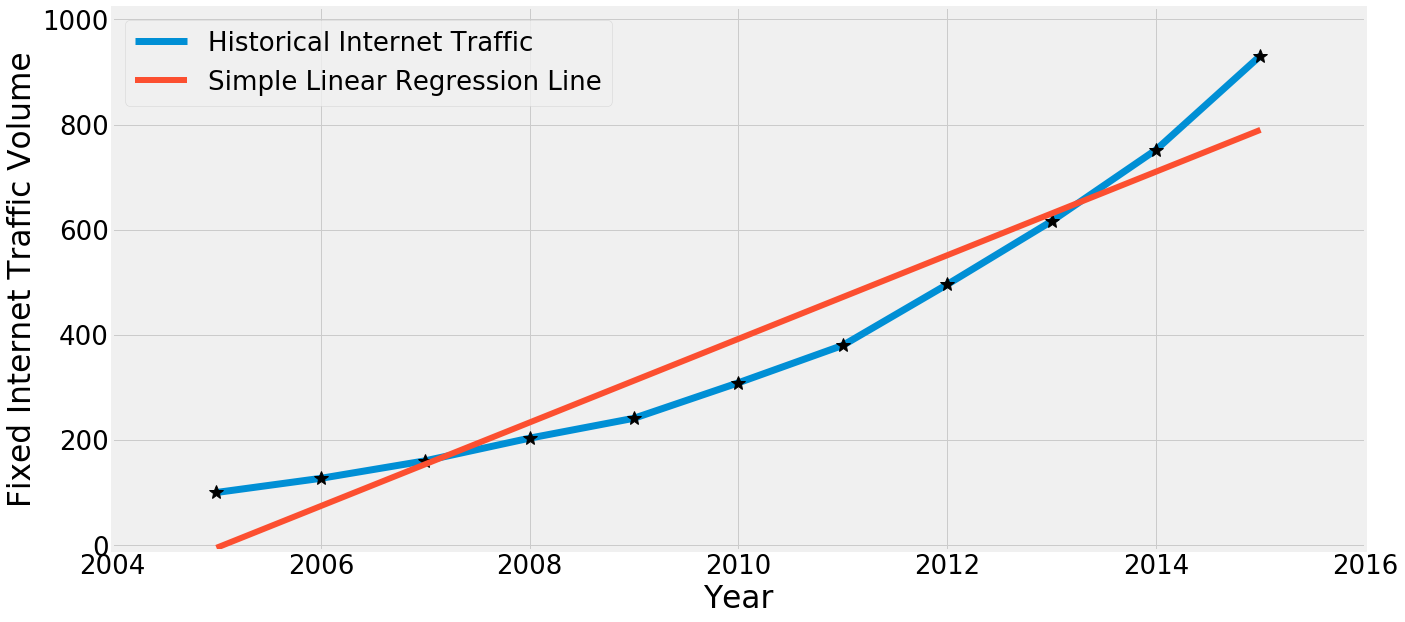

In [8]:
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

## Part 4: Linear Regression: Higher Order Polynomials
El trazado de regresión lineal indica que el modelo  de regresión lineal no es adecuado para proyectar el tráfico de internet en el año 2020. 

Fórmula para el segundo orden:

$$ y = a_0 + a_1  x  + a_2  x ^ 2  $$

Fórmula para el tercer orden:

$$ y = a_0 + a_1  x  + a_2  x ^ 2 + a_3  x ^ 3 $$

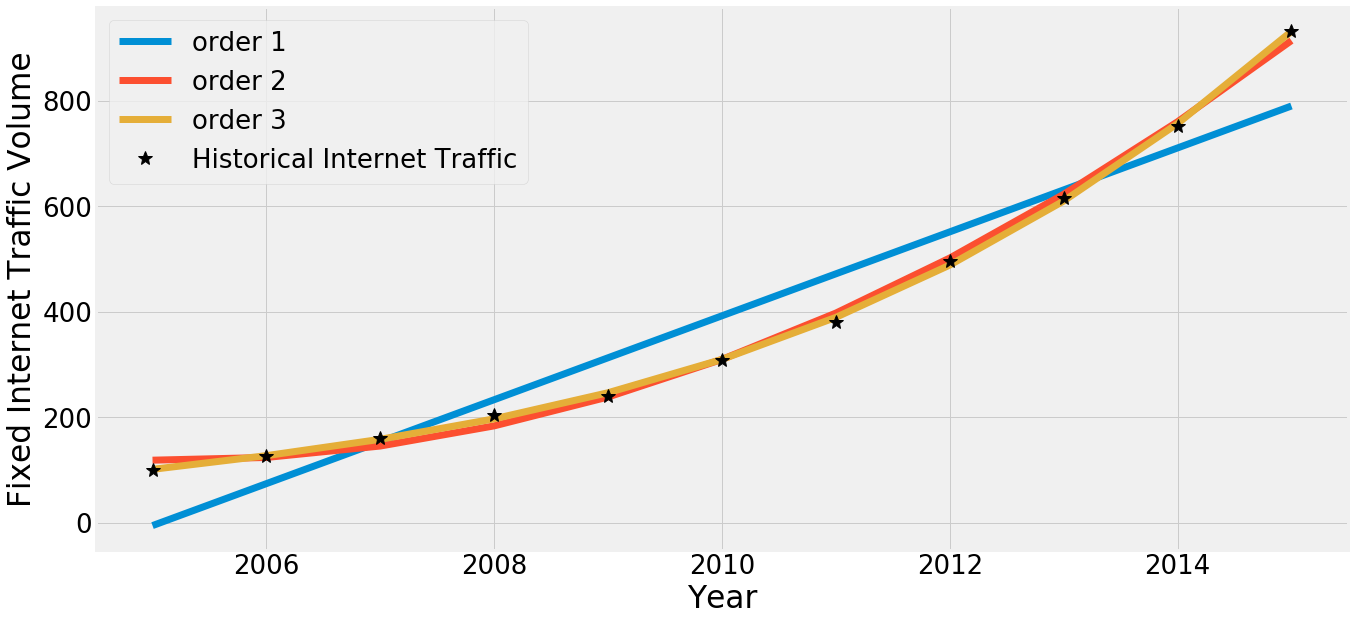

In [9]:
# Adaptar el modelo de regresión polinómico a segundo y tercer orden. 
# Guardar los errores y el ECM de cada modelo en una lista para compararlo posteriormente.
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

## Part 5: Calculating the Errors

In [10]:
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse


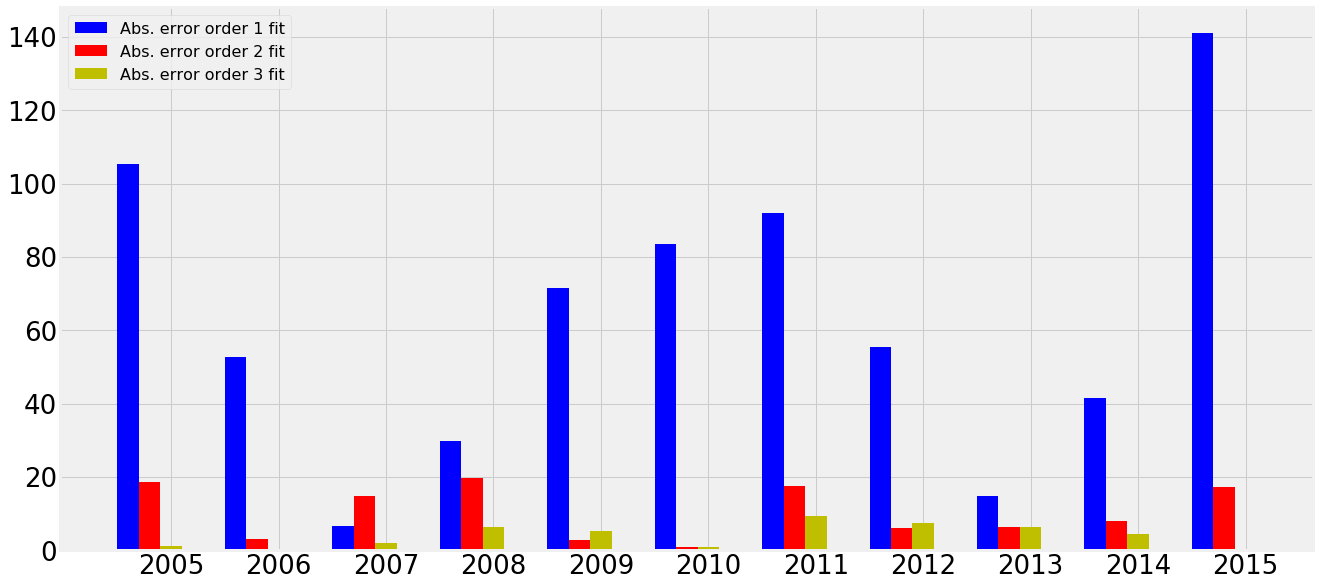

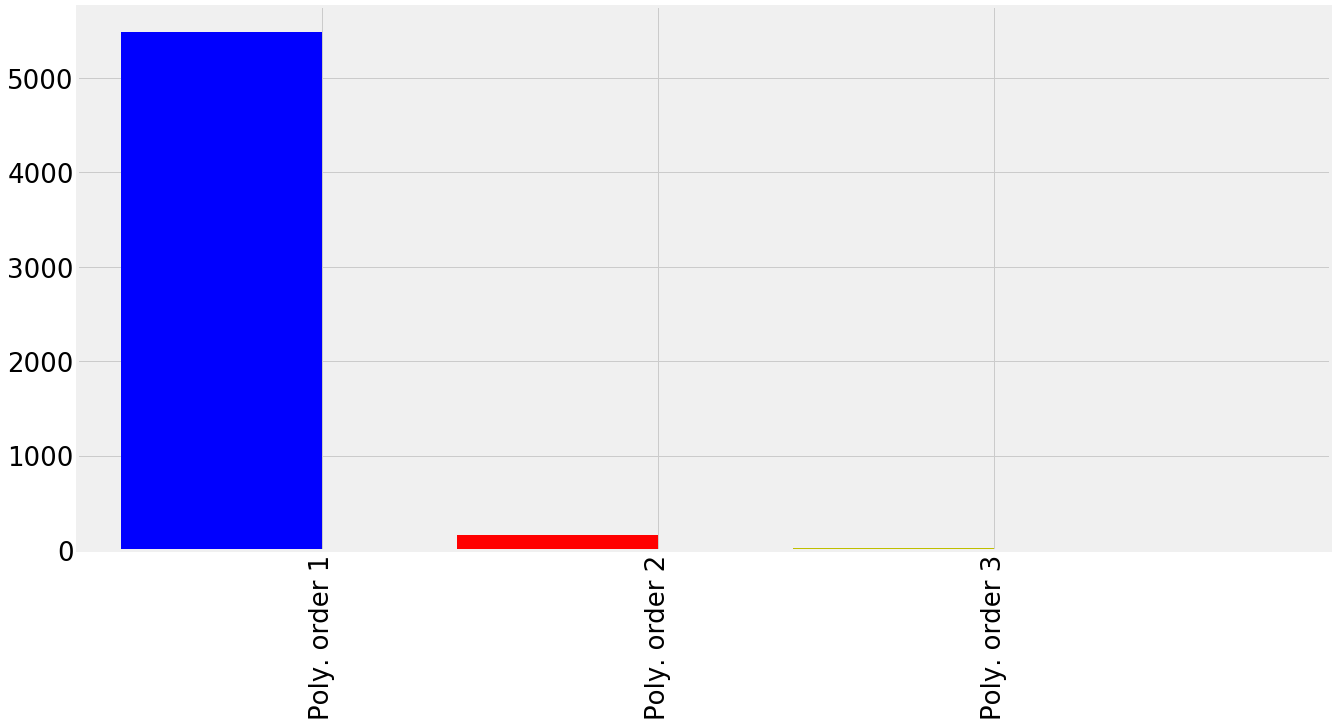

In [11]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

Parece que el polinomio de tercer orden tiene la menor cantidad de errores, y que el error entre el segundo y el tercer orden es insignificante. Esto sugiere que el tercer polinomio es el mejor para los órdenes utilizados.

$$ y = a_3 x ^ 3 + a_2  x ^ 2  + a_1  x  + a_0 $$

La función `polyfit` de la biblioteca `numpy` puede adaptar un modelo de regresión polinómico de cualquier orden y encontrar los parámetros que minimicen el ECM. En el cçodigo de abajo, el orden se define en 3.

In [12]:
# Polynomial function order
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials 
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129455e-01 -2.90500609e+03  5.82252148e+06 -3.89005429e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784735679626 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30741453 0.39124215 2.02723551 6.32983827 5.28393735 0.93068991
 9.41691497 7.3401094  6.27730463 4.48133027 0.1629071 ]
The MSE is :25.172183979187732


A partir de la salida del orden polinómico de 3, la ecuación pasa a ser la siguiente:
$$ y = 0.4831 x ^ 3 - 2905  x ^ 2  + 5.823 * 10^6  x  - 3.89 * 10^9 $$

## Part 6: Non-Linear Regression Model: Exponential Growth

El informe de VNI indica el índice de crecimiento anual esperado. En consecuencia, la fórmula matemática que vincula el tiempo con el volumen de tráfico puede definirse de la siguiente manera:

$$ y = a * (1 + r)^n $$

Donde $a$ es el valor inicial del volumen de tráfico, que es la variable dependiente, $r$ es el índice de **crecimiento anual** (expresado como la relación incremental entre los valores de dos años consecutivos) y  n  es la **cantidad de años** transcurridos desde  $2015$ , que es la variable dependiente.

La fórmula destaca el hecho de que la relación ente las variables dependiente e independiente implica una exponenciación, por eso se llama **crecimiento exponencial**.

En esta práctica vamos a usar la biblioteca `scipy.optimize` y su función `curvefit`, que requiere que se defina una función de curva y luego trata de encontrar los mejores parámetros para la función especificada utilizando el algoritmo de cuadrados mínimos no lineales.

Adaptar un modelo de regresión no lineal generalmente es más difícil desde una perspectiva computacional, y que no hay ninguna garantía de encontrar los parámetros que maximicen cualquier métrica de calidad de aptitud. De hecho, veremos que encontrar buenos parámetros podría depender de realizar una buena conjetura inicial.

In [13]:
# Non linear regression model fitting

# First, define the regression model function, in this case, we'll choose an exponential of the form y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
y = df_hist.traffic.values  # regressand

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the 
# algorithm on the estimated parameters 
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Store the absolute error 
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820148   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820148  1.95659906  0.39475809  3.03416216  8.50876833  2.65664482
  8.32850909 11.70265945 12.59154092  0.47531784  7.10276492]
The MSE is :47.23616366678741


El índice de crecimiento real $r$ correspondiente a los datos del tráfico de Internet fue 0,22 y el valor inicial  $a$  fue 100. Los valores estimados para estos parámetros son  $103.38$  y  $1.2467 -1 = 0.25$. La discrepancia entre esos valores se debe a las variaciones anuales impredecibles. Los valores estimados de la función `curve_fit` están desfasados $13 \%$ para  $r$  y  $3\$%  para $a$ .

## Part 7: Comparing Models

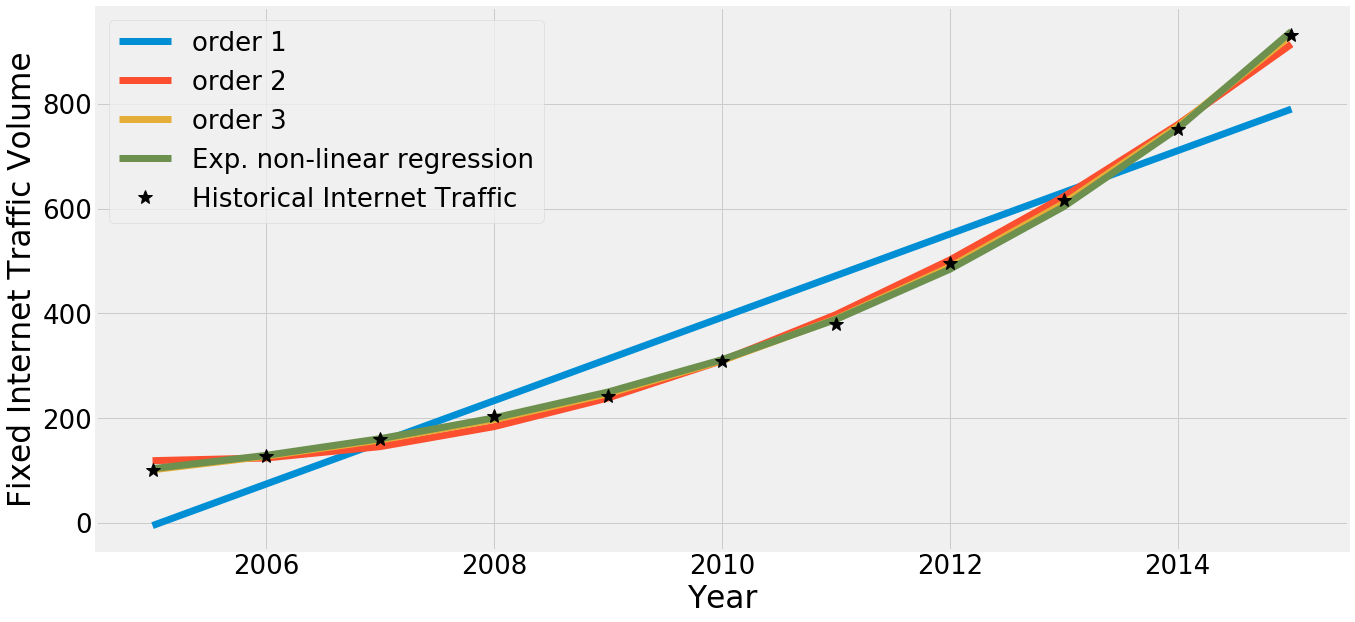

In [14]:
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:
    
    x = df_hist.year.values      
    y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Visualize exponenetial model fit
x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()


Para el rango seleccionado de años, la diferencia entre un modelo de regresión polinómico de segundo o tercer orden y el exponencial es insignificante.
Visualicemos los errores reales:

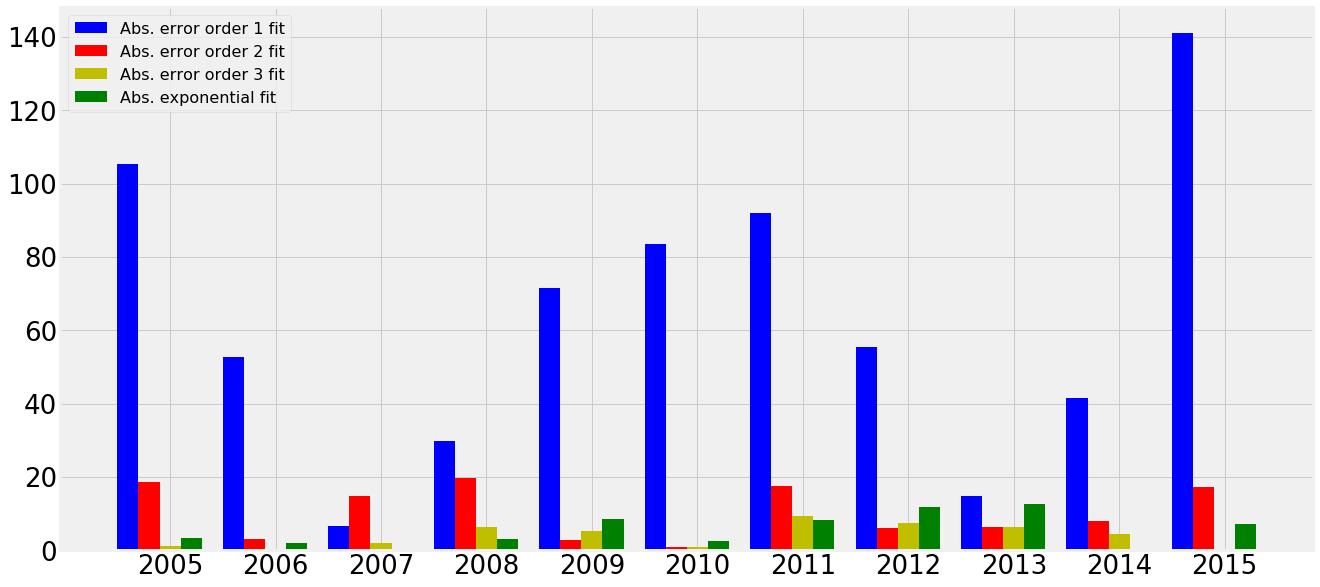

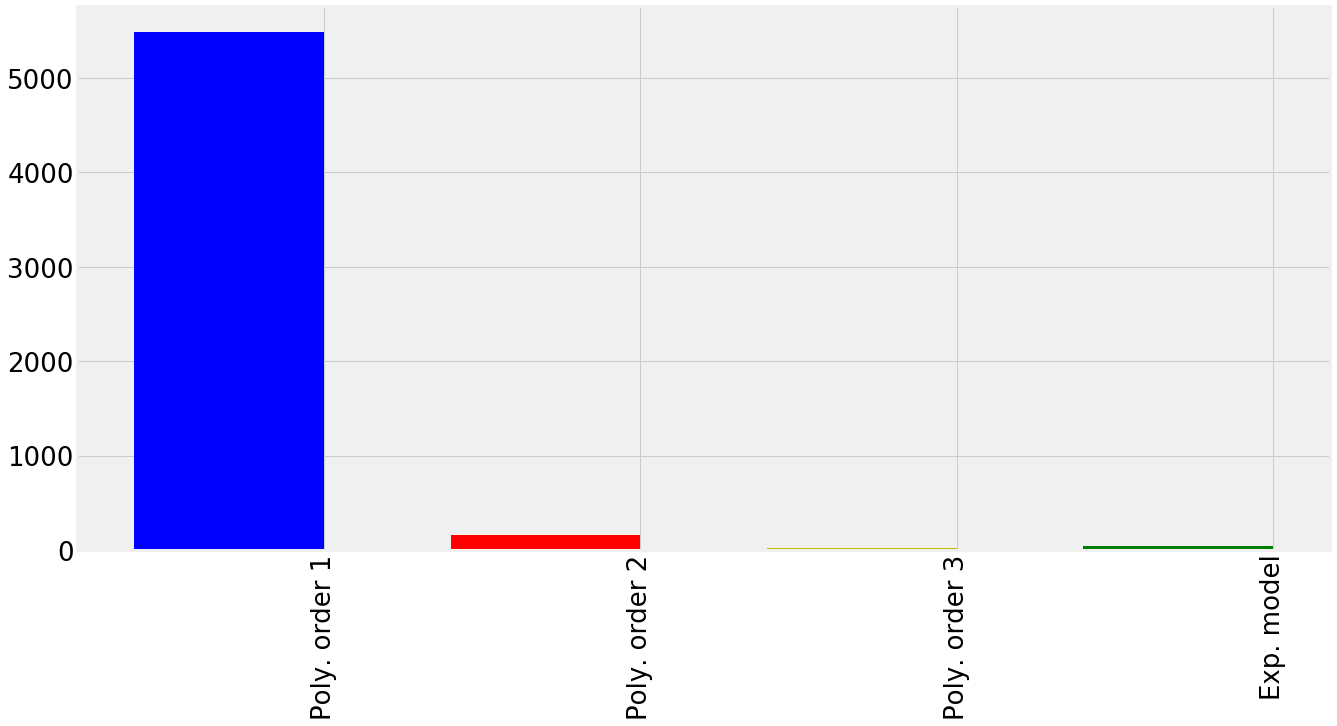

In [15]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

Si vemos el último trazado, parece que un polinomio de tercer orden, aunque no sea le modelo verdadero, se adapta mejor a las mediciones de tráfico en el rango observado. ¿Pero este modelo generalizará correctamente fuera de este rango (p. ej.: si queremos utilizarlo para realizar **predicciones** acerca del volumen futuro del tráfico de Internet)?

## Part 8: Use Regression Model to Predict Future Values
#### Step 1: Load and visualize projected Internet traffic volume.

In [17]:
filename = './internet_traffic_proj.csv'
df_proj = pd.read_csv(filename)
df_proj.head()

,traffic,year
0,931.200929,2015
1,1266.783122,2016
2,1427.662376,2017
3,1749.671543,2018
4,2281.869542,2019


#### Step 2: Compare linear and nonlinear model prediction errors.

Fusione los DataFrames `df_proj` y `df_hist`, y visualice cómo se comporta el modelo de regresión utilizado anteriormente al predecir valores futuros.

In [18]:
df = pd.concat([df_hist, df_proj]).reset_index()
df.drop('index', axis=1, inplace=True)
df = df.drop_duplicates() #The 2015 value is found in both the df_hist and df_proj df
df.head(20)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


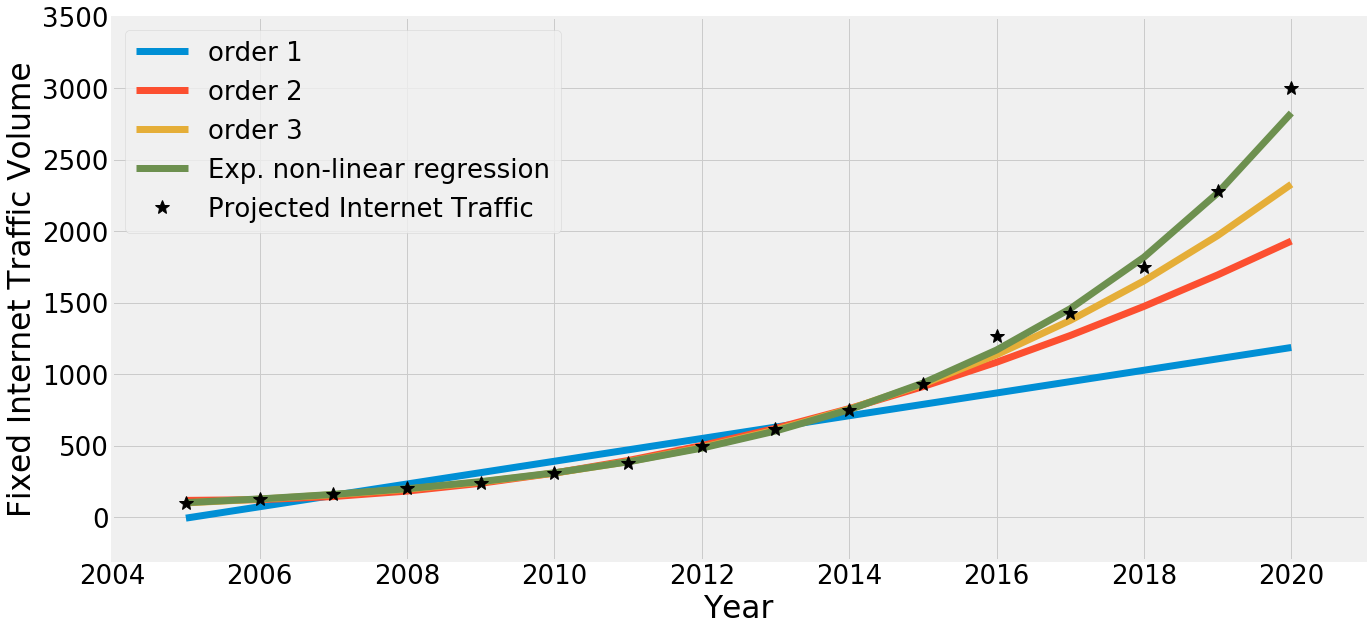

In [19]:
plt.figure(figsize = (20,10))

errors_all = []
mse_all = []

for model in models[0:-1]:
    
    # Visualize polynomial model fit
    x = df.year.values      
    y = df.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)
    
    # error and mse for polynomial models
    pred_y = model(x)
    e = np.abs(y - pred_y)
    errors_all.append(e)   #Store the absolute errors
    mse_all.append(np.sum(e**2)/len(df)) # Store the mse
    
    
# Visualize exponential model fit
x = np.arange(2021-2005)    # the regressor is not the year in itself, but the number of years from 2005
pred_y = my_exp_func(x, *models[-1])
plt.plot(df.year.values, pred_y, label = 'Exp. non-linear regression', linewidth = 7)

# errors and mse for exponential model
e = np.abs(y - pred_y)
errors_all.append(e)   #Store the absolute errors
mse_all.append(np.sum(e**2)/len(df)) # Store the mse

plt.plot(df.year, df.traffic, '*k', markersize = 14, label='Projected Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.axis([2004,2021, -300, 3500])
plt.show()

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>